In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
import images2gif as ig
from scipy.interpolate import interp1d

In [3]:
cd "~\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted"

/Users/jdhare/Google Drive/MAGPIE/data/2015/s1214_15 C Reconnection 12 Frame/s1214_15/s1214_15 shifted


In [4]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)

    bk_fn=shot+" Background_0"+st+".png"
    bk_im=plt.imread(bk_fn) #read background image
    #bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

bb=np.zeros((13, b[0].shape[0], b[0].shape[1])) #create an empty array to store the results
ss=np.zeros((13, s[0].shape[0], s[0].shape[1]))
bb[0]=b[0]
ss[0]=s[0]
shifts=np.zeros((13,2))

In [5]:
#normalise data to intensity of background images
norms=[b_im[100:-100,100:-100].sum() for b_im in b]
n_max=max(norms)
nn=[n/n_max for n in norms]
s_n=[s_im[100:-100,100:-100]/n for s_im, n in zip(s, nn)]

In [7]:
#normalise data to maximum intensity in any one frame?
#s_max=max([s_im.max() for s_im in s_n])
#s_nn=[s_im/s_max for s_im in s_n]

In [33]:
#logarithm of data
s_l=[np.log(s_im) for s_im in s_n]
lv_min=-5
lv_max=0.2
s_nl=[(np.clip(s_im, a_min=lv_min, a_max=lv_max)-lv_min)/(lv_max-lv_min) for s_im in s_l]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


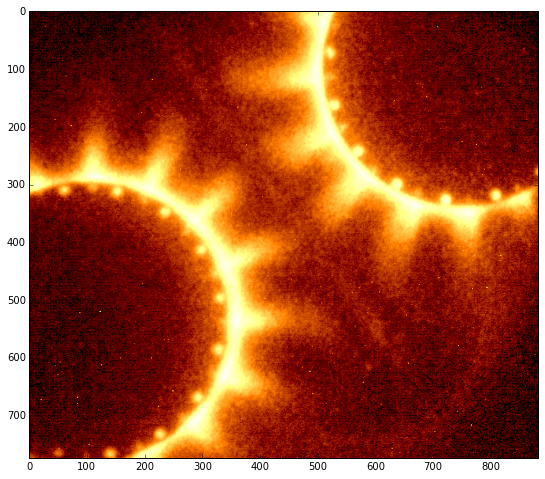

In [41]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(s_nl[4], cmap='afmhot', clim=[0,1])

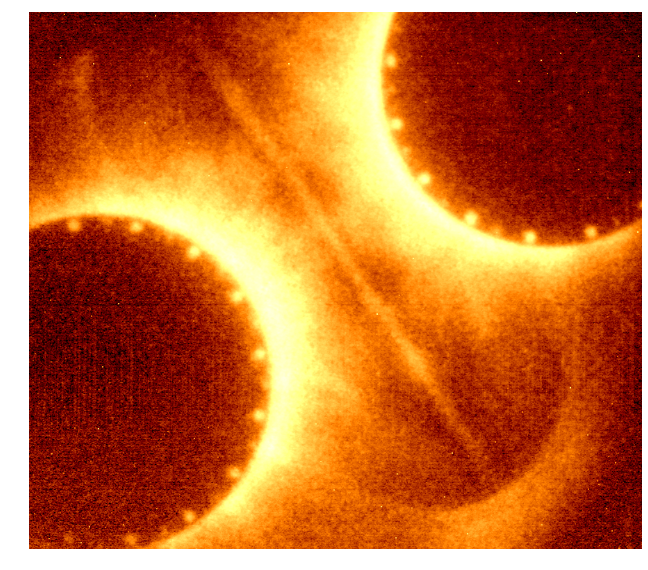

In [65]:
fig, ax=plt.subplots(figsize=(12,8))
hot_im=[]
for im in s_nl:
    ax.imshow(im, cmap='afmhot', clim=[0,1])
    plt.axis('off')
    fig.tight_layout()
    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)

In [66]:
shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',hot_im, duration=0.2)

In [22]:
in_lv=[0, 0.1, 0.5, 1.0]
out_lv=[0, 0.8, 1.0, 1.0]
f=interp1d(in_lv, out_lv, kind='linear')
s_c=[f(s_im) for s_im in s_nn]

In [14]:
shfn=shot+" Shot_c"
ig.writeGif(shfn+'.gif',, duration=0.5)

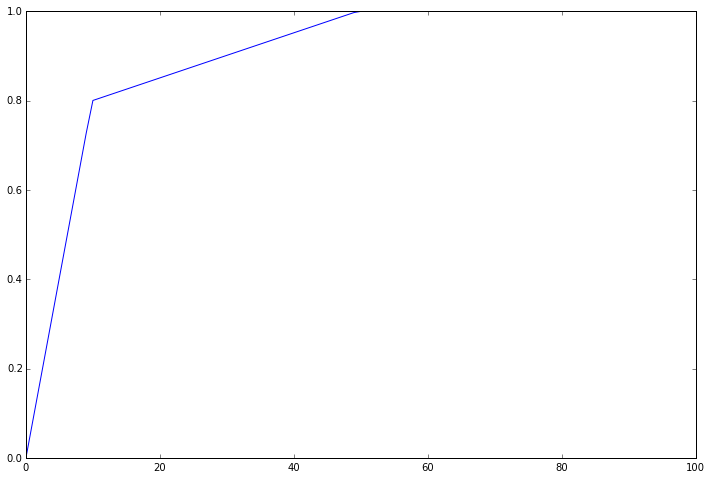

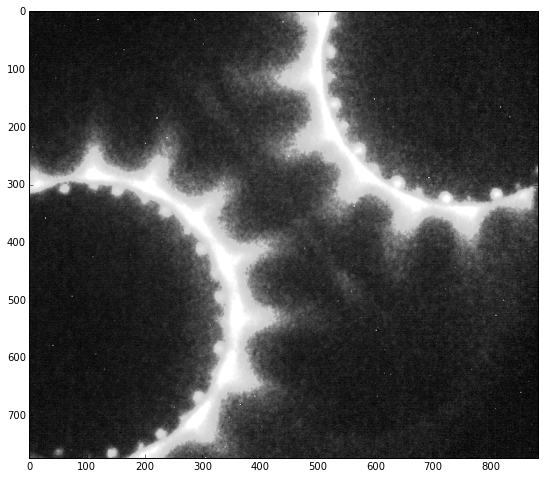

In [23]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(f(np.linspace(0,1.0,100)))
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(f(s_nn[3]), cmap='gray', clim=[0,1])

In [12]:
26/255

0.10196078431372549

# New Code

In [21]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
s=[]


for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)
    

shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',s, duration=0.2)